<a href="https://colab.research.google.com/github/MathewsJosh/Topicos-Computacao-Cientifica-II/blob/main/Aula_09_HoughTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformada de Hough

Para realizarmos a transformada de Hough para detecção de retas, precisamos importar a imagem e aplicar o detector de Canny para extrair os contornos da imagem. A imagem utilizada nesse tutorial pode ser obtida [aqui](https://drive.google.com/file/d/1uOHnLlnvxfXwvUpOsxIRUdlUpAttkrsa/view?usp=sharing).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


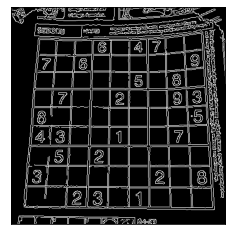

In [ ]:
import math
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('/content/drive/MyDrive/ColabFiles/sudoku.png', cv.IMREAD_GRAYSCALE)

canny = cv.Canny(image, 50, 100, apertureSize = 3,L2gradient = False)

# Faz uma cópia da imagem em RGB para mostrar os resultados
destino = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

%matplotlib inline

plt.imshow(canny, cmap='gray', vmin=0, vmax=255)
plt.xticks([]), plt.yticks([])
plt.show()

## 1 - Transformada de Hough "clássica"

A transformada de Hough para detecção de retas é implementada no OpenCV pelo método `HoughLines`, o qual possui os seguintes parâmetros:
* A imagem de entrada
* O valor da discretização em $\rho$
* O valor de discretização em $\theta$
* Um limiar que define quantos votos um acumulador deve ter para ser considerado uma reta
* Parâmetros opcionais relacionados à transformada em multi-escala

O método retorna uma lista de pares $(\rho,\theta)$ com os parâmetros das retas encontradas. Retornará um vetor de dimensões [n][1][2], onde n é o número de retas encontradas.

Observe que o método devolve apenas os parâmetros da reta, mas não os pontos que a constituem.

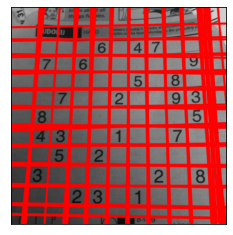

In [ ]:
retas = cv.HoughLines(canny, 1, np.pi / 180, 150)

#desenha as retas na imagem
for i in range(0, len(retas)):
    rho = retas[i][0][0]
    theta = retas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(destino, pt1, pt2, (255,0,0), 3, cv.LINE_AA)

%matplotlib inline

plt.imshow(destino)
plt.xticks([]), plt.yticks([])
plt.show()

## 2- Transformada de Hough Probabilística

O OpenCV implementa uma outra versão da transformada de Hough, chamada transformada de Hough Probabilística. Essa versão é mais eficiente computacionalmente e utiliza apenas uma parte dos pontos escolhidos aleatoriamente para calcular os acumuladores. Com a redução do limiar é possível obter resultados semelhantes ao método "clássico". Essa versão é implementada pelo método `HoughLinesP`, o qual possui os seguintes parâmetros:
* A imagem de entrada
* O valor da discretização em $\rho$
* O valor de discretização em $\theta$
* Um limiar que define quantos votos um acumulador deve ter para ser considerado uma reta
* O comprimento mínimo para que uma reta seja considerada
* O *gap* máximo entre pontos na mesma linha para que eles possam ser conectados

Uma vantagem desse método é que ele retorna os pontos extremos das retas.

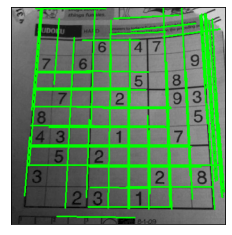

In [ ]:
destino = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

retas = cv.HoughLinesP(canny,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for reta in retas:
    x1,y1,x2,y2 = reta[0]
    cv.line(destino,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(destino)
plt.xticks([]), plt.yticks([])
plt.show()

## 3 - Exercícios

1. Experimente mudar os valores dos parâmetros dos métodos anteriores e analise as mudanças no resultado.
2. Pesquise sobre a implementação no OpenCV da transformação de Hough para detecção de círculos.

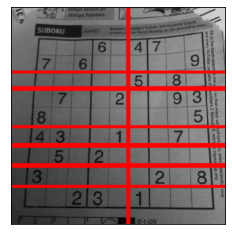

In [ ]:
image = cv.imread('/content/drive/MyDrive/ColabFiles/sudoku.png', cv.IMREAD_GRAYSCALE)

canny = cv.Canny(image, 50, 100, apertureSize = 3,L2gradient = False)

# Faz uma cópia da imagem em RGB para mostrar os resultados
destino = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

retas = cv.HoughLines(canny, 0.5, np.pi / 90, 180)

#desenha as retas na imagem
for i in range(0, len(retas)):
    rho = retas[i][0][0]
    theta = retas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(destino, pt1, pt2, (255,0,0), 3, cv.LINE_AA)

%matplotlib inline

plt.imshow(destino)
plt.xticks([]), plt.yticks([])
plt.show()

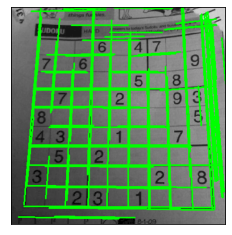

In [ ]:
image = cv.imread('/content/drive/MyDrive/ColabFiles/sudoku.png', cv.IMREAD_GRAYSCALE)

canny = cv.Canny(image, 50, 100, apertureSize = 3,L2gradient = False)

# Faz uma cópia da imagem em RGB para mostrar os resultados
destino = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

retas = cv.HoughLinesP(canny,1,np.pi/360,60,minLineLength=70,maxLineGap=10)
for reta in retas:
    x1,y1,x2,y2 = reta[0]
    cv.line(destino,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(destino)
plt.xticks([]), plt.yticks([])
plt.show()

####[HoughCircles](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)

[Tutorial Medium](https://medium.com/turing-talks/houghcircles-detec%C3%A7%C3%A3o-de-c%C3%ADrculos-em-imagens-com-opencv-e-python-2d229ad9d43b)

Parâmetros

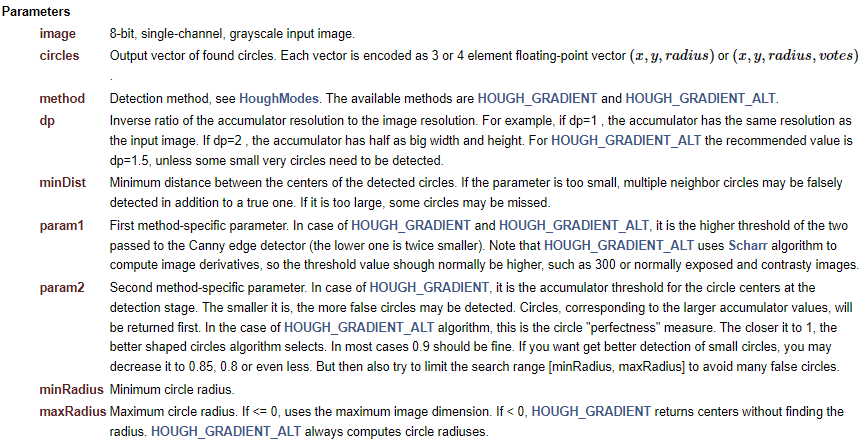

Número de círculos: 31


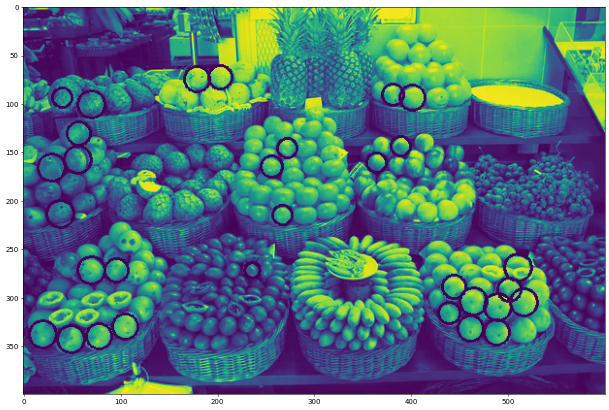

In [161]:
img = cv.imread('/content/drive/MyDrive/ColabFiles/frutas.jpg', cv.IMREAD_GRAYSCALE)
#plt.rcParams['figure.dpi'] = 50

circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, dp=1.08, minDist=5, param1=100, param2=30, minRadius=3, maxRadius=15)

# Changing the dtype  to int
circles = np.uint16(np.around(circles))
cimg = img.copy()

for i in circles[0,:]:
  # draw the outer circle
  cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  #cv.circle(cimg,(i[0],i[1]),2,(255,0,0),10)

print("Número de círculos: " + str(len(circles[0,:])))

plt.figure(figsize=(15,15))
plt.imshow(cimg)